In [1]:
import sys
import os
import pandas as pd

In [2]:
sys.path.append(os.path.abspath('../scripts'))

Read CSV files

In [3]:

credit_card_df = pd.read_csv('C:/Users/teeyob/EagleEye_Fraud_Detection/data/creditcard.csv')
fraud_df = pd.read_csv('C:/Users/teeyob/EagleEye_Fraud_Detection/data/Fraud_Data.csv')
ip_address_df = pd.read_csv('C:/Users/teeyob/EagleEye_Fraud_Detection/data/IpAddress_to_Country.csv')

In [4]:
credit_card_df.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [6]:
ip_address_df.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


Check for missing values

In [7]:
missing_values = fraud_df.isnull().sum()
missing_values

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

Check for duplicate rows

In [8]:
duplicate_count = fraud_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


Correct data types

In [9]:
from data_preprocessing import correct_data_types
fraud_df_cleaned = correct_data_types(fraud_df)
print("Data Types:\n", fraud_df_cleaned.dtypes)

Data Types:
 user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id               category
source                  category
browser                 category
sex                     category
age                        int64
ip_address                 int64
class                      int64
dtype: object


Univariate Analysis

Summary statistics for signup_time:
  Statistic                    signup_time
0     count                         151112
1      mean  2015-04-20 00:56:09.511329280
2       min            2015-01-01 00:00:42
3       25%     2015-02-18 09:52:48.500000
4       50%            2015-04-19 04:41:30
5       75%  2015-06-18 14:47:22.750000128
6       max            2015-08-18 04:40:29 

Summary statistics for purchase_time:
  Statistic                  purchase_time
0     count                         151112
1      mean  2015-06-16 02:56:38.759952896
2       min            2015-01-01 00:00:44
3       25%     2015-04-18 14:41:25.500000
4       50%     2015-06-18 13:46:17.500000
5       75%     2015-08-17 18:48:31.500000
6       max            2015-12-16 02:56:05 



<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

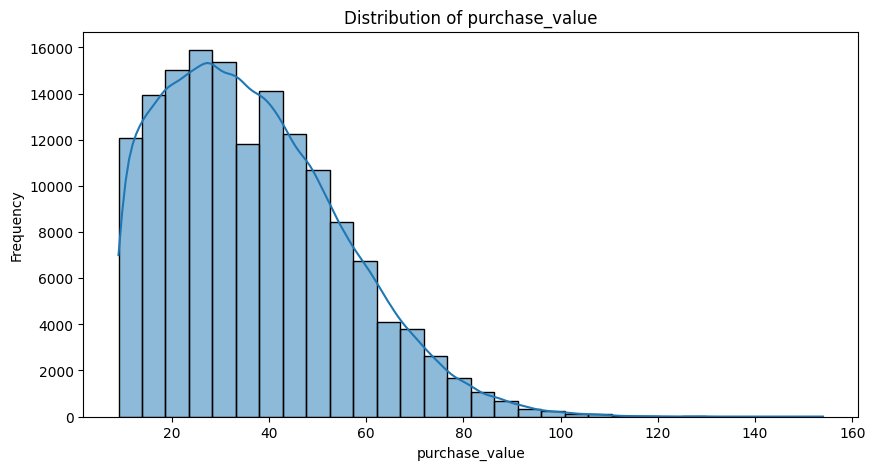

Summary statistics for purchase_value:
  Statistic  purchase_value
0     count   151112.000000
1      mean       36.935372
2       std       18.322762
3       min        9.000000
4       25%       22.000000
5       50%       35.000000
6       75%       49.000000
7       max      154.000000 



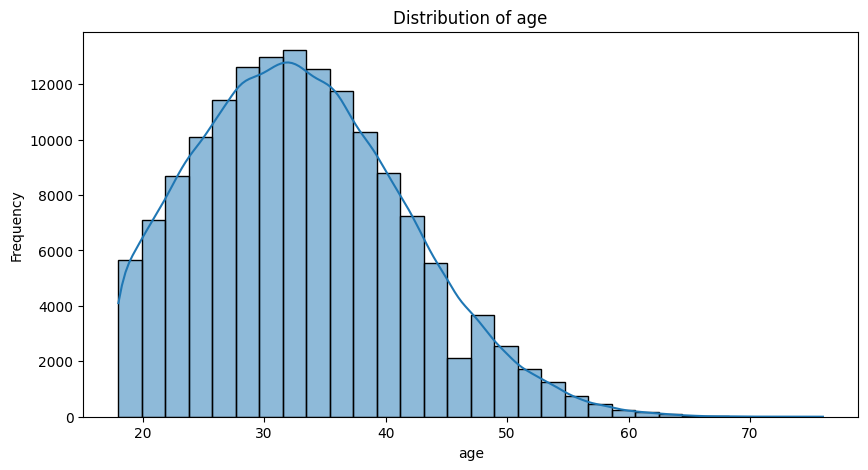

Summary statistics for age:
  Statistic            age
0     count  151112.000000
1      mean      33.140704
2       std       8.617733
3       min      18.000000
4       25%      27.000000
5       50%      33.000000
6       75%      39.000000
7       max      76.000000 



In [10]:
from EDA import univariate_analysis
univariate_analysis(fraud_df_cleaned, ['signup_time', 'purchase_time', 'purchase_value', 'age'])

Bivariate Analysis

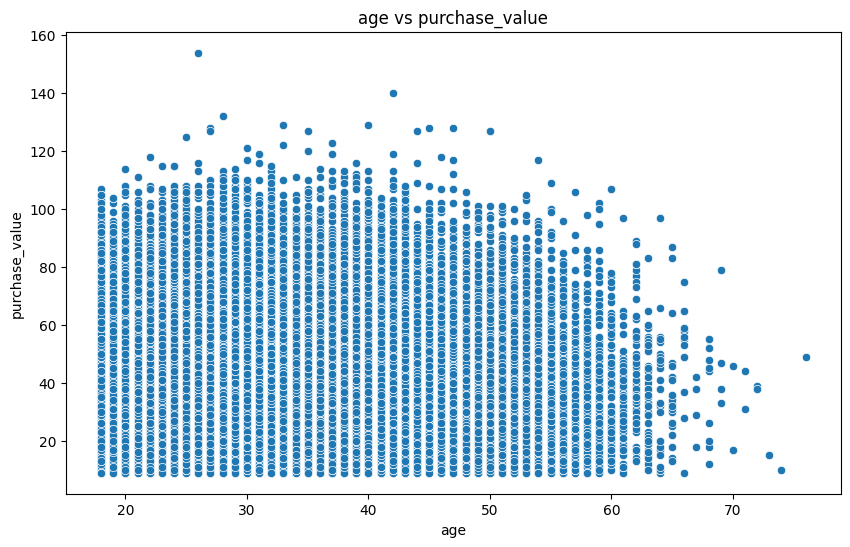

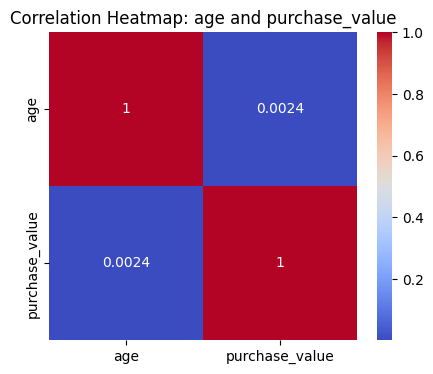

In [11]:
from EDA import bivariate_analysis
bivariate_analysis(fraud_df_cleaned, 'age', 'purchase_value')

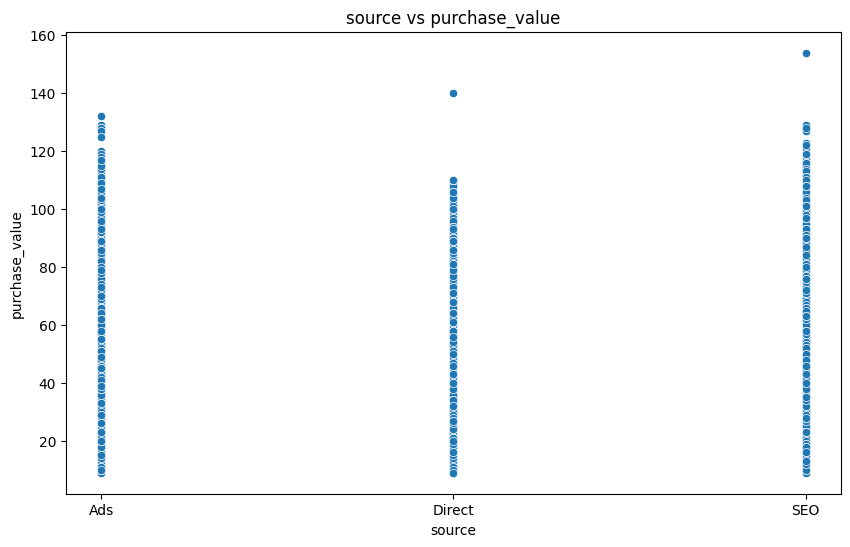

In [12]:
bivariate_analysis(fraud_df_cleaned, 'source', 'purchase_value')

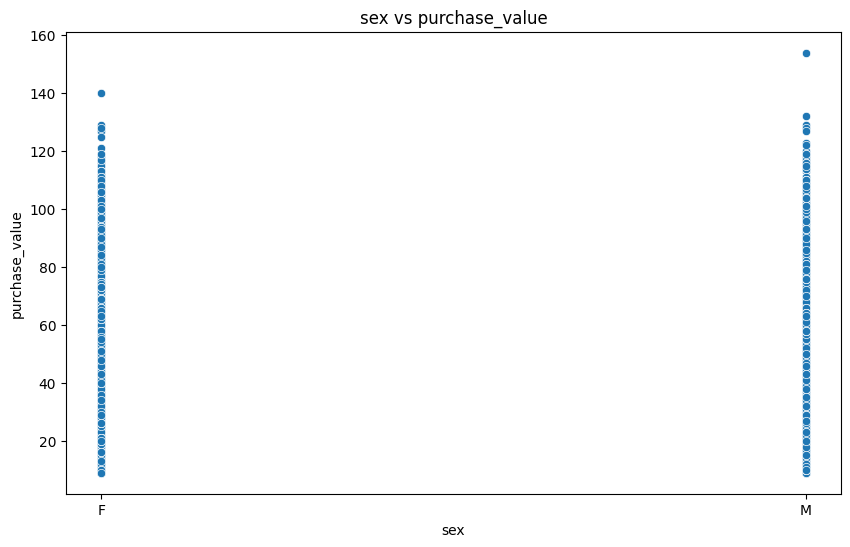

In [13]:
bivariate_analysis(fraud_df_cleaned, 'sex', 'purchase_value')

Convert the IP ranges in ip_address_df

In [14]:
from data_preprocessing import convert_ip_to_int
ip_address_df_cleaned = convert_ip_to_int(ip_address_df)

Merge fraud data with the cleaned IP address data

In [15]:
from data_preprocessing import merge_ip_country

merged_fraud_df = merge_ip_country(fraud_df_cleaned, ip_address_df_cleaned)
print(merged_fraud_df.head())

Number of rows after merging and filtering: 129146
     user_id         signup_time       purchase_time  purchase_value  \
634   247547 2015-06-28 03:00:34 2015-08-09 03:57:29              47   
635   220737 2015-01-28 14:21:11 2015-02-11 20:28:28              15   
636   390400 2015-03-19 20:49:09 2015-04-11 23:41:23              44   
637    69592 2015-02-24 06:11:57 2015-05-23 16:40:14              55   
638   174987 2015-07-07 12:58:11 2015-11-03 04:04:30              51   

         device_id  source browser sex  age  ip_address  class  \
634  KIXYSVCHIPQBR     SEO  Safari   F   30    16778864      0   
635  PKYOWQKWGJNJI     SEO  Chrome   F   34    16842045      0   
636  LVCSXLISZHVUO     Ads      IE   M   29    16843656      0   
637  UHAUHNXXUADJE  Direct  Chrome   F   30    16938732      0   
638  XPGPMOHIDRMGE     SEO  Chrome   F   37    16971984      0   

     lower_bound_ip_address  upper_bound_ip_address    country  
634              16778240.0              16779263.0  A

 Feature Engineering with transaction frequency and velocity

In [16]:
from data_preprocessing import feature_engineering
fraud_df_fe = feature_engineering(merged_fraud_df)
fraud_df_fe.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,time_to_purchase,hour_of_day,day_of_week,transaction_count,transaction_velocity
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,16778864,0,16778240.0,16779263.0,Australia,3632215.0,3,6,1,0.000013
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,16842045,0,16809984.0,16842751.0,Thailand,1231637.0,20,2,1,0.000012
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,16843656,0,16843264.0,16843775.0,China,1997534.0,23,5,1,0.000022
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,16938732,0,16924672.0,16941055.0,China,7640897.0,16,5,1,0.000007
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,16971984,0,16941056.0,16973823.0,Thailand,10249579.0,4,1,1,0.000005


Encode categorical features

In [17]:
from data_preprocessing import encode_categorical_features
fraud_df_encoded = encode_categorical_features(fraud_df_fe)
fraud_df_encoded.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,...,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,30,16778864,0,16778240.0,16779263.0,...,False,False,True,False,False,False,False,True,True,False
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,34,16842045,0,16809984.0,16842751.0,...,False,False,True,True,False,False,False,False,True,False
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,29,16843656,0,16843264.0,16843775.0,...,True,False,False,False,False,True,False,False,False,True
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,30,16938732,0,16924672.0,16941055.0,...,False,True,False,True,False,False,False,False,True,False
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,37,16971984,0,16941056.0,16973823.0,...,False,False,True,True,False,False,False,False,True,False


Normalize and scale numerical features

In [18]:
from data_preprocessing import normalize_and_scale
scaled_fraud_df = normalize_and_scale(fraud_df_encoded, ['purchase_value', 'age', 'time_to_purchase'])
scaled_fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,...,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,0.549607,KIXYSVCHIPQBR,-0.363124,16778864,0,16778240.0,16779263.0,...,False,False,True,False,False,False,False,True,True,False
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,-1.197335,PKYOWQKWGJNJI,0.101168,16842045,0,16809984.0,16842751.0,...,False,False,True,True,False,False,False,False,True,False
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,0.385831,LVCSXLISZHVUO,-0.479197,16843656,0,16843264.0,16843775.0,...,True,False,False,False,False,True,False,False,False,True
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,0.986342,UHAUHNXXUADJE,-0.363124,16938732,0,16924672.0,16941055.0,...,False,True,False,True,False,False,False,False,True,False
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,0.767974,XPGPMOHIDRMGE,0.449387,16971984,0,16941056.0,16973823.0,...,False,False,True,True,False,False,False,False,True,False
